In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/WQU-Capstone-HFT/Dataset/Kaiko/L3_OrderBooks_Extract/L5Book.csv')
data = data[(data.bid_1_price != 0) & (data.ask_1_price != 0)].reset_index(drop=True)

In [ ]:
data = data.replace({0:np.nan})

In [ ]:
timestamp = pd.DatetimeIndex ( data.timestamp ).astype ( np.int64 )/1000000
timestamp = np.array(timestamp)

In [ ]:
timestamp

array([1.5921792e+12, 1.5921792e+12, 1.5921792e+12, ..., 1.5922656e+12,
       1.5922656e+12, 1.5922656e+12])

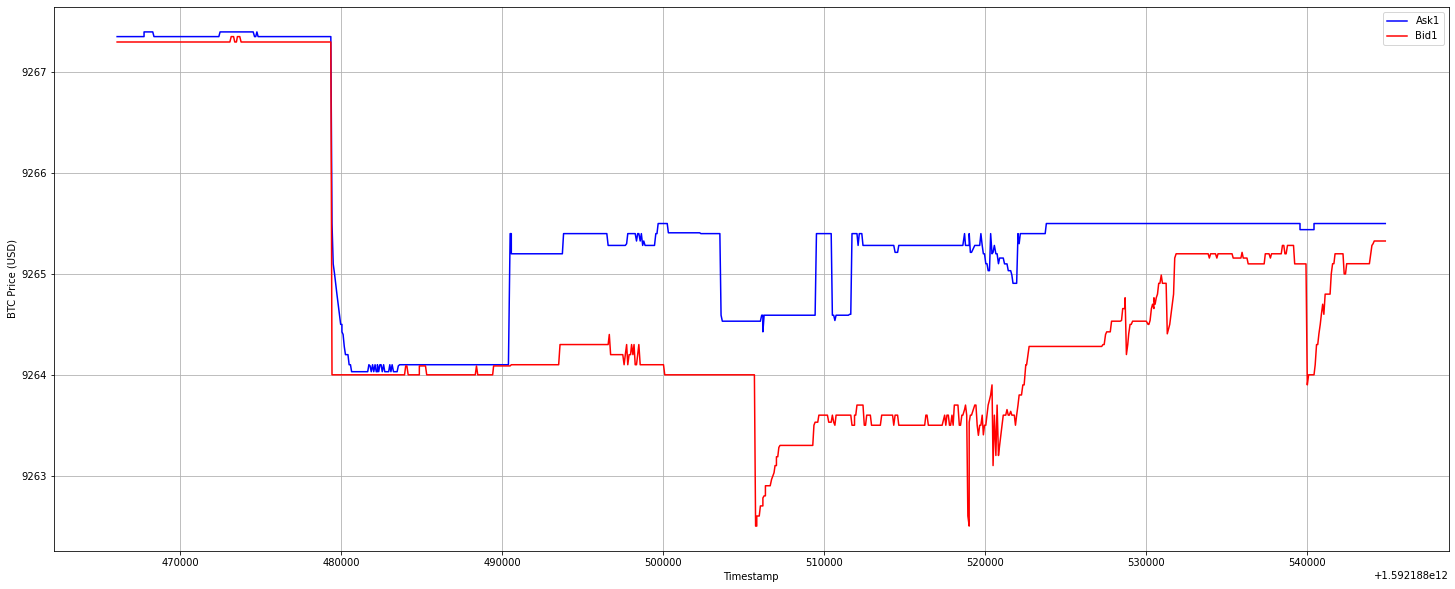

In [ ]:
import matplotlib.pyplot as plt

st = 108000
en = 109000

plt.figure(figsize = (25,10))
plt.grid()
plt.plot(timestamp[st:en], data.ask_1_price[st:en], label = 'Ask1',color = 'b')
plt.plot(timestamp[st:en], data.bid_1_price[st:en], label = 'Bid1',color = 'r')
plt.xlabel("Timestamp")
plt.ylabel("BTC Price (USD)")
plt.legend(loc = 1)

In [ ]:
feat_data = pd.DataFrame(data.timestamp)

In [ ]:
feat_data['mid_price'] = (data.bid_1_price + data.ask_1_price)/2
feat_data['spread_b1'] = feat_data.mid_price - data.bid_1_price
feat_data['spread_b2'] = feat_data.mid_price - data.bid_2_price
feat_data['spread_b3'] = feat_data.mid_price - data.bid_3_price
feat_data['spread_b4'] = feat_data.mid_price - data.bid_4_price
feat_data['spread_b5'] = feat_data.mid_price - data.bid_5_price
feat_data['spread_a1'] = feat_data.mid_price - data.ask_1_price
feat_data['spread_a2'] = feat_data.mid_price - data.ask_2_price
feat_data['spread_a3'] = feat_data.mid_price - data.ask_3_price
feat_data['spread_a4'] = feat_data.mid_price - data.ask_4_price
feat_data['spread_a5'] = feat_data.mid_price - data.ask_5_price
feat_data['numerator']    = 0
feat_data['denominator']  = 0
feat_data = feat_data.replace({np.nan:0})
data = data.replace({np.nan:0})

In [ ]:
b = 50
for i in range(1,6):
  feat_data.numerator   += (b - feat_data[f'spread_b{i}']) * data[f'bid_{i}_vol']
  feat_data.numerator   -= (-b - feat_data[f'spread_a{i}']) * data[f'ask_{i}_vol']
  feat_data.denominator += (b - feat_data[f'spread_b{i}']) * data[f'bid_{i}_vol']
  feat_data.denominator += (-b - feat_data[f'spread_a{i}']) * data[f'ask_{i}_vol']
feat_data['obi'] = feat_data.numerator/feat_data.denominator

In [ ]:
# data_timestamp = pd.DataFrame(pd.DatetimeIndex(data.timestamp).astype(np.int64)/1000000)
# data['criteria']= (data_timestamp - data_timestamp.shift()) < 3
# data[(data.criteria | data.criteria.shift(-1))][(data.bid_2_price == 0) | (data.bid_2_price.shift(-1) == 0)]

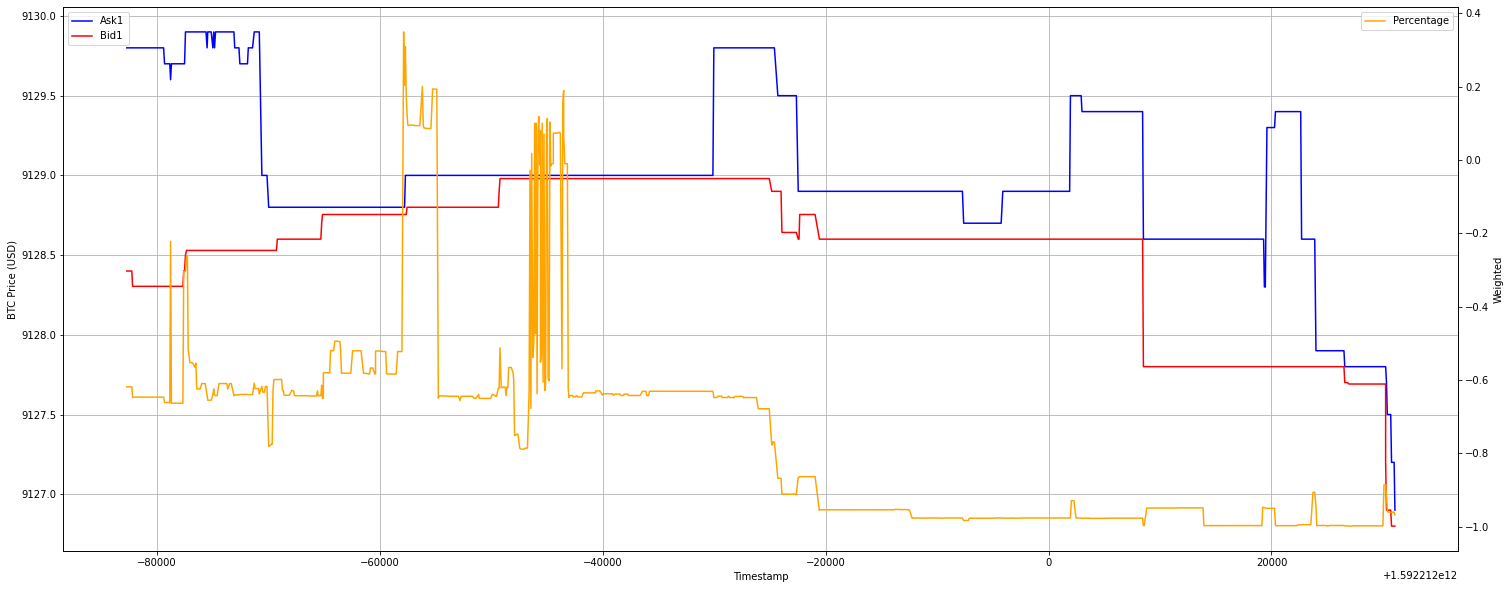

In [ ]:
data = data.replace({np.nan:0})

fig, ax1 = plt.subplots(figsize=(25,10))

ax2 = ax1.twinx()

st = 358000
en = 359000

ax1.grid()
ax1.plot(timestamp[st:en], data.ask_1_price[st:en], label = 'Ask1',       color = 'b')
ax1.plot(timestamp[st:en], data.bid_1_price[st:en], label = 'Bid1',       color = 'r')
ax2.plot(timestamp[st:en], feat_data.pct[st:en],    label = 'Percentage', color = 'orange')

ax1.set_xlabel("Timestamp")
ax1.set_ylabel("BTC Price (USD)")
ax2.set_ylabel("Weighted")

ax1.legend(loc=2)
ax2.legend(loc=1)

(array([200535., 102704.,  76332.,  67418.,  62720.,  64954.,  65716.,
         69992.,  99042., 166277.]),
 array([-9.99957226e-01, -7.99964445e-01, -5.99971663e-01, -3.99978882e-01,
        -1.99986100e-01,  6.68137731e-06,  1.99999463e-01,  3.99992244e-01,
         5.99985026e-01,  7.99977808e-01,  9.99970589e-01]),
 <a list of 10 Patch objects>)

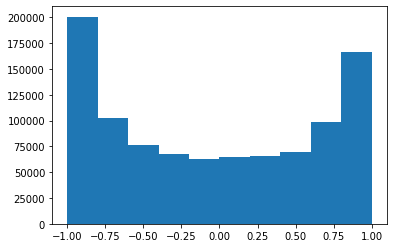

In [ ]:
plt.hist(feat_data.pct)

In [ ]:
# Label traded

target_up     = 2     # unit = usd
target_down   = -2     # unit = usd
time_to_exit  = 5000    # units = ms

triple_label = []

for i in range(0, len(data.timestamp)):
  try:
    entry_price   = data.ask_1_price[i]
    exit_criteria = (timestamp <= timestamp[i] + time_to_exit)
    filter_event  = np.array(data[exit_criteria]['bid_1_price'])
    if len(np.where(filter_event>=entry_price + target_up)[0])>0 and len(np.where(filter_event<=entry_price + target_down)[0])>0:
      if np.where(filter_event>=entry_price + target_up)[0][0] < np.where(filter_event<=entry_price + target_down)[0][0]:
        i_label = 1
      else:
        i_label = -1
    elif len(np.where(filter_event>=entry_price + target_up)[0])>0:
      i_label = 1
    elif len(np.where(filter_event<=entry_price + target_down)[0])>0:
      i_label = -1
    else:
      i_label = 0
    triple_label.append(i_label)
  except:
    triple_label.append(np.nan)
  
  if i % 10000 == 0:
    print(f'{i} at time {datetime.now()}')

0 at time 2021-04-11 23:35:22.450534
10000 at time 2021-04-11 23:35:43.532430
20000 at time 2021-04-11 23:36:14.363696
30000 at time 2021-04-11 23:36:54.403805
40000 at time 2021-04-11 23:37:45.047614
50000 at time 2021-04-11 23:38:46.242460
60000 at time 2021-04-11 23:39:57.518626
70000 at time 2021-04-11 23:41:19.835777
80000 at time 2021-04-11 23:42:49.860616
90000 at time 2021-04-11 23:44:31.361976
100000 at time 2021-04-11 23:46:27.693175
110000 at time 2021-04-11 23:48:34.133125
120000 at time 2021-04-11 23:50:51.328045
130000 at time 2021-04-11 23:53:18.291837
140000 at time 2021-04-11 23:55:52.873216
150000 at time 2021-04-11 23:58:35.574319
160000 at time 2021-04-12 00:01:15.562039
170000 at time 2021-04-12 00:04:03.451193
180000 at time 2021-04-12 00:07:01.565111
190000 at time 2021-04-12 00:10:08.696211
200000 at time 2021-04-12 00:13:24.816650
210000 at time 2021-04-12 00:16:46.980454
220000 at time 2021-04-12 00:20:17.377735
230000 at time 2021-04-12 00:23:54.767983
240000

In [ ]:
pd.DataFrame(triple_label).to_csv('/content/drive/MyDrive/WQU-Capstone-HFT/Dataset/Kaiko/L3_OrderBooks_Extract/TradeLabel.csv')

In [ ]:
dataset = pd.DataFrame(data.timestamp)
dataset['spread'] = data.ask_1_price - data.bid_1_price
dataset['weight'] = feat_data.pct
dataset['triple_label'] = triple_label

In [ ]:
timestamp <= timestamp[0] + 2000

In [ ]:
entry_price   = data.ask_1_price[1000]
exit_criteria = (timestamp <= timestamp[1000] + 2000)
filter_event  = data[exit_criteria]['bid_1_price']

In [ ]:
filter_event

In [ ]:
exit_criteria.sum()

In [ ]:
for i in range(0,1000):
  print (i)
  if i >= 10:
    break

In [ ]:
a = np.array(data.bid_1_price)
len(np.where(a>19350)[0])#[0]

0